In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [22]:
# import shutil

# shutil.rmtree('/kaggle/working/current_frame.png')
# shutil.rmtree('/kaggle/working/output_tracking2.mp4')
# # shutil.rmtree('/kaggle/working/runs')

In [10]:
!pip install roboflow ultralytics

from roboflow import Roboflow
rf = Roboflow(api_key="m4SLpfw6AXfhlgSvfz4W")
project = rf.workspace("new-workspace-ufulu").project("human-recognition-t30c4")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Human-recognition-2 in yolov11:: 100%|██████████| 640/640 [00:00<00:00, 7340.86it/s]


In [11]:
!sed -i '$d' {dataset.location}/data.yaml   # Delete the last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the third-to-last line

!echo 'test: ../test/images' >> {dataset.location}/data.yaml
!echo 'train: ../train/images' >> {dataset.location}/data.yaml
!echo 'val: ../valid/images' >> {dataset.location}/data.yaml

In [23]:
%cd '/kaggle/working/'

!yolo task=detect mode=train model=yolo11m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640 plots=True

/kaggle/working
Ultralytics 8.3.204 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Human-recognition-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pe

TRAINING RESULTS PLOTS


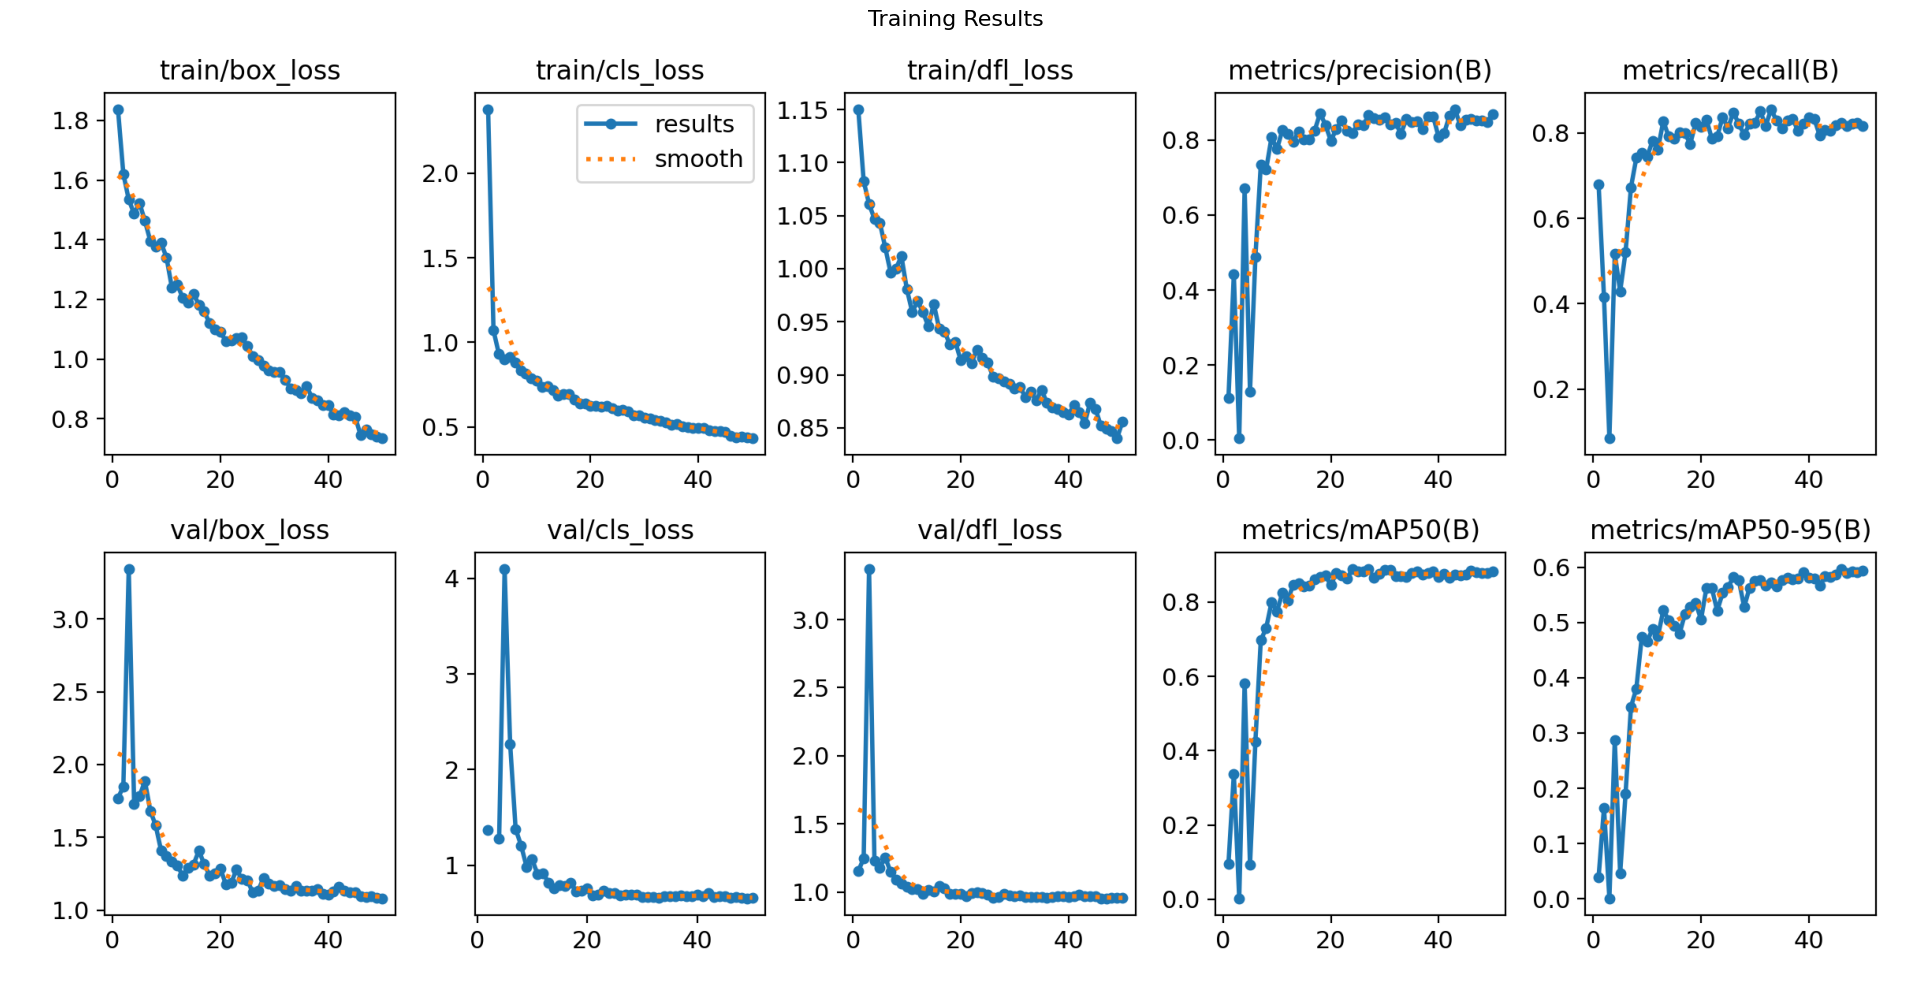

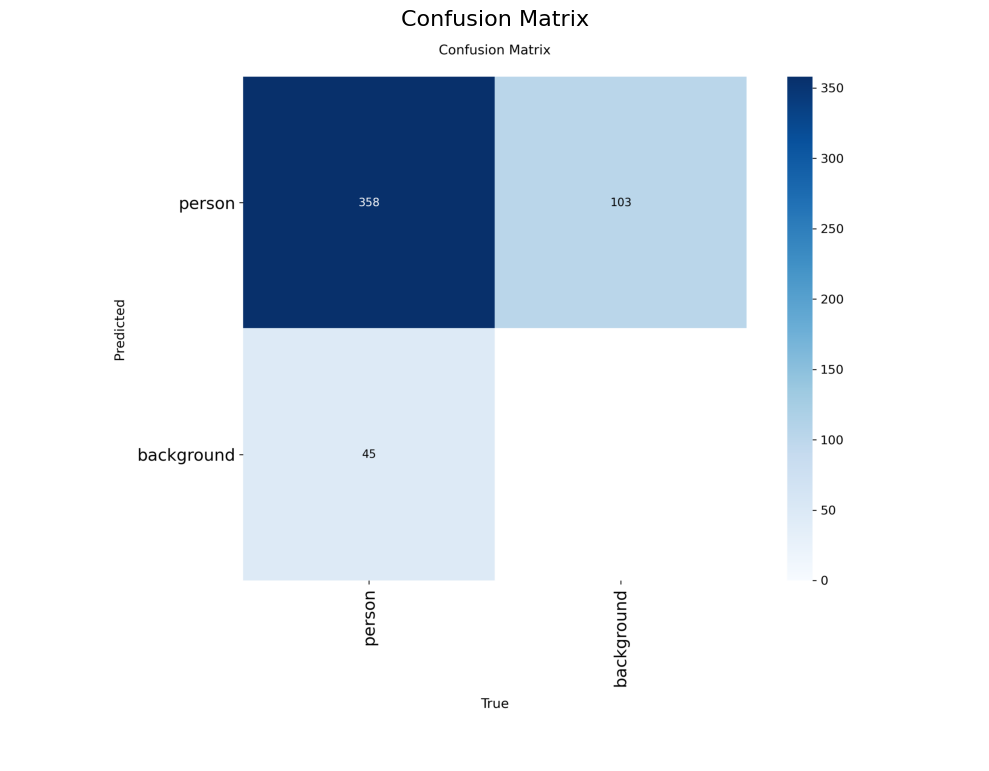


mAP METRICS

Final Epoch Results:
  mAP@50     : 0.8818
  mAP@50-95  : 0.5942

Other Metrics:
  Precision  : 0.8689
  Recall     : 0.8164


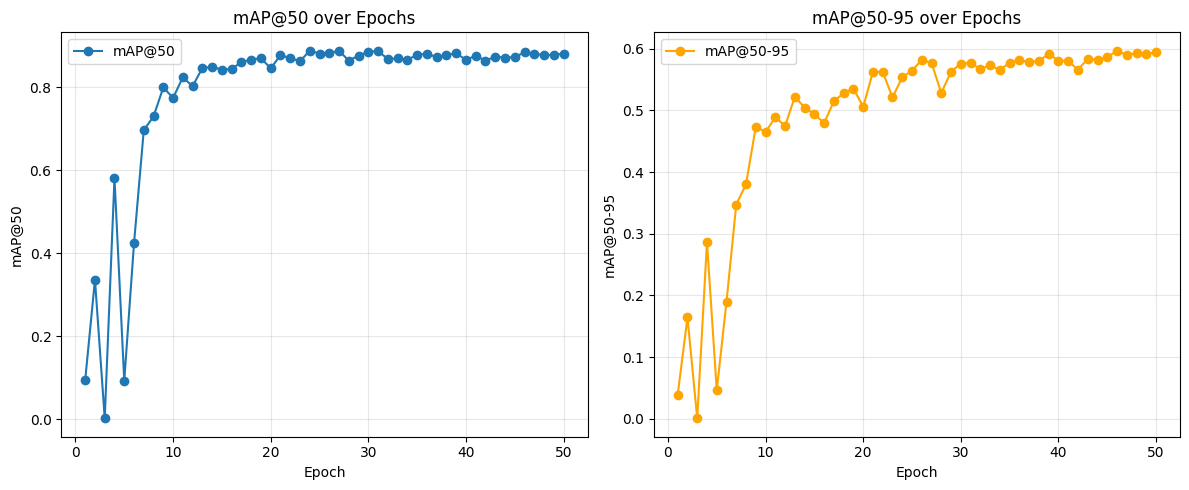


METRICS TABLE (All Epochs)
 epoch  metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  metrics/mAP50-95(B)
     1               0.11143            0.67990           0.09500              0.03893
     2               0.44230            0.41523           0.33642              0.16427
     3               0.00436            0.08437           0.00239              0.00062
     4               0.67125            0.51678           0.58152              0.28653
     5               0.12975            0.42928           0.09290              0.04592
     6               0.48840            0.52114           0.42444              0.18987
     7               0.73403            0.67246           0.69703              0.34740
     8               0.72182            0.74194           0.73005              0.38048
     9               0.80826            0.75311           0.80006              0.47356
    10               0.77569            0.74442           0.77486              0.46516
    11         

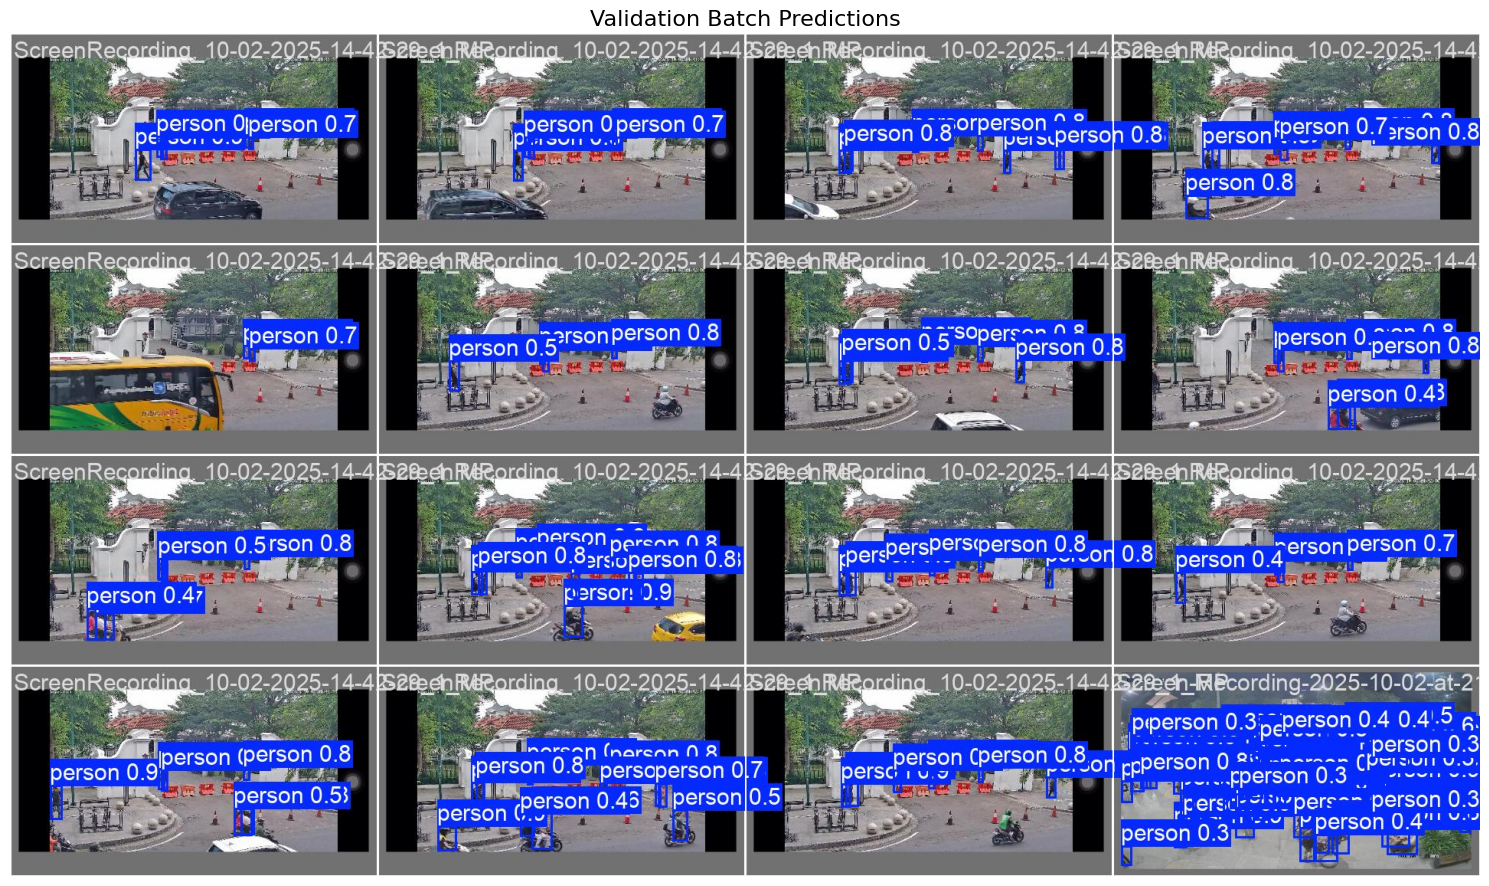

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

results_path = '/kaggle/working/runs/detect/train'

print("=" * 50)
print("TRAINING RESULTS PLOTS")
print("=" * 50)

results_img_path = f'{results_path}/results.png'
if os.path.exists(results_img_path):
    img = Image.open(results_img_path)
    plt.figure(figsize=(20, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Training Results', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print(f"Results plot not found at {results_img_path}")

confusion_matrix_path = f'{results_path}/confusion_matrix.png'
if os.path.exists(confusion_matrix_path):
    img = Image.open(confusion_matrix_path)
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Confusion Matrix', fontsize=16)
    plt.tight_layout()
    plt.show()

print("\n" + "=" * 50)
print("mAP METRICS")
print("=" * 50)

import pandas as pd
csv_path = f'{results_path}/results.csv'

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.strip()
    
    last_epoch = df.iloc[-1]
    
    print(f"\nFinal Epoch Results:")
    print(f"  mAP@50     : {last_epoch['metrics/mAP50(B)']:.4f}")
    print(f"  mAP@50-95  : {last_epoch['metrics/mAP50-95(B)']:.4f}")
    
    print(f"\nOther Metrics:")
    print(f"  Precision  : {last_epoch['metrics/precision(B)']:.4f}")
    print(f"  Recall     : {last_epoch['metrics/recall(B)']:.4f}")
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(df['epoch'], df['metrics/mAP50(B)'], marker='o', label='mAP@50')
    plt.xlabel('Epoch')
    plt.ylabel('mAP@50')
    plt.title('mAP@50 over Epochs')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], marker='o', label='mAP@50-95', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('mAP@50-95')
    plt.title('mAP@50-95 over Epochs')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "=" * 50)
    print("METRICS TABLE (All Epochs)")
    print("=" * 50)
    display_cols = ['epoch', 'metrics/precision(B)', 'metrics/recall(B)', 
                    'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
    print(df[display_cols].to_string(index=False))
    
else:
    print(f"Results CSV not found at {csv_path}")

print("\n" + "=" * 50)
print("SAMPLE VALIDATION PREDICTIONS")
print("=" * 50)

val_batch_path = f'{results_path}/val_batch0_pred.jpg'
if os.path.exists(val_batch_path):
    img = Image.open(val_batch_path)
    plt.figure(figsize=(15, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Validation Batch Predictions', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print(f"Validation predictions not found at {val_batch_path}")

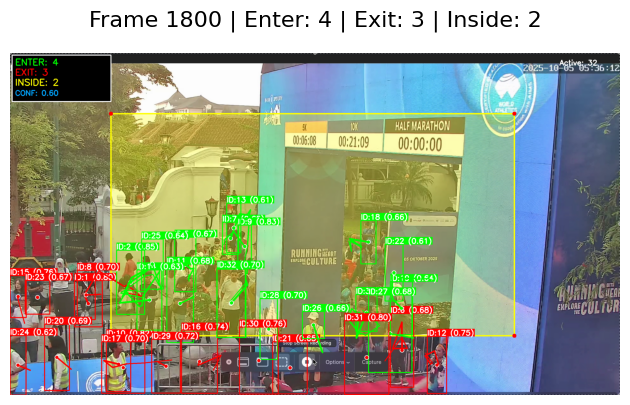


✅ PROCESSING COMPLETE!
📊 Final Statistics:
   Total Entered: 4
   Total Exited: 3
   Currently Inside: 2
   Active Tracks: 32

💾 Output saved to: /kaggle/working/output_tracking2.mp4


🎉 Done! Check 'output_tracking.mp4' for results


In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from collections import defaultdict, deque
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import clear_output

class PeopleTracker:
    def __init__(self, polygon_points, max_age=30):
        """
        Args:
            polygon_points: List of (x,y) tuples
            max_age: Maximum frames a track can be missing before deletion
        """
        self.polygon = np.array(polygon_points, np.int32)
        self.tracks = {}
        self.next_id = 1
        self.track_history = defaultdict(lambda: deque(maxlen=50))
        self.max_distance = 150
        self.max_age = max_age
        
        self.enter_count = 0
        self.exit_count = 0
        self.current_count = 0
        
    def is_in_polygon(self, point):
        """Check if point inside polygon"""
        return cv2.pointPolygonTest(self.polygon, point, False) >= 0
    
    def get_centroid(self, bbox):
        """Get center point of bbox [x1, y1, x2, y2]"""
        x1, y1, x2, y2 = bbox
        return (int((x1 + x2) / 2), int((y1 + y2) / 2))
    
    def calculate_distance(self, p1, p2):
        """Euclidean distance"""
        return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
    
    def update(self, detections):
        """
        Update tracks with new detections
        Args:
            detections: List of bboxes [[x1,y1,x2,y2,conf], ...]
        """
        current_centroids = []
        for det in detections:
            bbox = det[:4]
            centroid = self.get_centroid(bbox)
            current_centroids.append({
                'bbox': bbox,
                'centroid': centroid,
                'conf': det[4]
            })
        
        matched_tracks = set()
        matched_dets = set()
        
        for track_id, track in list(self.tracks.items()):
            best_match = None
            best_dist = self.max_distance
            
            for idx, det_info in enumerate(current_centroids):
                if idx in matched_dets:
                    continue
                    
                dist = self.calculate_distance(
                    track['centroid'], 
                    det_info['centroid']
                )
                
                if dist < best_dist:
                    best_dist = dist
                    best_match = (idx, det_info)
            
            if best_match:
                idx, det_info = best_match
                matched_dets.add(idx)
                matched_tracks.add(track_id)
                
                # Update track
                old_inside = track['is_inside']
                new_centroid = det_info['centroid']
                new_inside = self.is_in_polygon(new_centroid)
                
                # Count entrance/exit
                if not old_inside and new_inside:
                    self.enter_count += 1
                    self.current_count += 1
                    print(f"✅ ID {track_id} ENTERED | Total Inside: {self.current_count}")
                elif old_inside and not new_inside:
                    self.exit_count += 1
                    self.current_count = max(0, self.current_count - 1)
                    print(f"❌ ID {track_id} EXITED | Total Inside: {self.current_count}")
                
                self.tracks[track_id] = {
                    'bbox': det_info['bbox'],
                    'centroid': new_centroid,
                    'is_inside': new_inside,
                    'age': 0,  # Reset age
                    'conf': det_info['conf']
                }
                self.track_history[track_id].append(new_centroid)
            else:
                # Increase age if not matched
                self.tracks[track_id]['age'] += 1
        
        # Remove old tracks
        for track_id in list(self.tracks.keys()):
            if self.tracks[track_id]['age'] > self.max_age:
                print(f"🗑️ ID {track_id} removed (too old)")
                del self.tracks[track_id]
                del self.track_history[track_id]
        
        # Create new tracks for unmatched detections
        for idx, det_info in enumerate(current_centroids):
            if idx not in matched_dets:
                track_id = self.next_id
                self.next_id += 1
                
                is_inside = self.is_in_polygon(det_info['centroid'])
                self.tracks[track_id] = {
                    'bbox': det_info['bbox'],
                    'centroid': det_info['centroid'],
                    'is_inside': is_inside,
                    'age': 0,
                    'conf': det_info['conf']
                }
                self.track_history[track_id].append(det_info['centroid'])
                print(f"🆕 New ID {track_id} created | Inside: {is_inside}")
        
        return self.tracks
    
    def draw_tracks(self, frame, conf_threshold=0.5):
        """Draw polygon, tracks, and counters"""
        # Draw polygon with thick border and semi-transparent fill
        overlay = frame.copy()
        cv2.fillPoly(overlay, [self.polygon], (0, 255, 255))
        cv2.addWeighted(overlay, 0.3, frame, 0.7, 0, frame)
        cv2.polylines(frame, [self.polygon], True, (0, 255, 255), 5)
        
        # Draw polygon corners
        for point in self.polygon:
            cv2.circle(frame, tuple(point), 10, (0, 0, 255), -1)
        
        # Store threshold for display
        self.current_conf_threshold = conf_threshold
        
        # Draw tracks
        for track_id, track in self.tracks.items():
            bbox = track['bbox']
            centroid = track['centroid']
            is_inside = track['is_inside']
            conf = track['conf']
            
            # Color: Green if inside, Red if outside
            color = (0, 255, 0) if is_inside else (0, 0, 255)
            
            # Draw bbox (thicker)
            x1, y1, x2, y2 = map(int, bbox)
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 4)
            
            # Draw track ID and confidence (larger text)
            label = f'ID:{track_id} ({conf:.2f})'
            (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 1.2, 3)
            cv2.rectangle(frame, (x1, y1-h-10), (x1+w, y1), color, -1)
            cv2.putText(frame, label, (x1, y1-5),
                       cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 255), 3)
            
            # Draw centroid (larger)
            cv2.circle(frame, centroid, 8, color, -1)
            cv2.circle(frame, centroid, 10, (255, 255, 255), 2)
            
            # Draw trajectory
            history = list(self.track_history[track_id])
            for i in range(1, len(history)):
                thickness = int(3 + (i / len(history)) * 5)
                cv2.line(frame, history[i-1], history[i], color, thickness)
        
        # Draw info panel (larger)
        panel_height = 240
        cv2.rectangle(frame, (10, 10), (500, panel_height), (0, 0, 0), -1)
        cv2.rectangle(frame, (10, 10), (500, panel_height), (255, 255, 255), 3)
        
        cv2.putText(frame, f'ENTER: {self.enter_count}', (25, 60),
                   cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 4)
        cv2.putText(frame, f'EXIT: {self.exit_count}', (25, 110),
                   cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 4)
        cv2.putText(frame, f'INSIDE: {self.current_count}', (25, 160),
                   cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 255), 4)
        cv2.putText(frame, f'CONF: {conf_threshold:.2f}', (25, 210),
                   cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 165, 0), 3)
        
        # Draw active tracks count
        cv2.putText(frame, f'Active: {len(self.tracks)}', (frame.shape[1]-300, 60),
                   cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 255), 3)
        
        return frame


def process_video(video_path, model_path, polygon_points, output_path='output.mp4', 
                  conf_threshold=0.3, target_fps=10, display_every=5):
    """
    Process video with lower FPS and better visualization
    
    Args:
        video_path: Path to input video
        model_path: Path to YOLO model
        polygon_points: Detection area polygon
        output_path: Output video path
        conf_threshold: Detection confidence threshold
        target_fps: Output video FPS (lower = slower)
        display_every: Display frame every N frames
    """
    # Load model
    print("Loading YOLO model...")
    model = YOLO(model_path)
    
    # Initialize tracker
    tracker = PeopleTracker(polygon_points, max_age=30)
    
    # Open video
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    original_fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    print(f"\n{'='*60}")
    print(f"Video Info:")
    print(f"  Resolution: {width}x{height}")
    print(f"  Original FPS: {original_fps}")
    print(f"  Output FPS: {target_fps}")
    print(f"  Total Frames: {total_frames}")
    print(f"{'='*60}\n")
    
    # Video writer with lower FPS
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, target_fps, (width, height))
    
    frame_count = 0
    processed_count = 0
    skip_frames = max(1, original_fps // target_fps)  # Process every Nth frame
    
    plt.figure(figsize=(20, 12))
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        frame_count += 1
        
        # Skip frames to reduce FPS
        if frame_count % skip_frames != 0:
            continue
        
        processed_count += 1
        
        # Run YOLO detection (only person class = 0)
        results = model(frame, conf=conf_threshold, classes=[0], verbose=False)[0]
        
        # Extract detections
        detections = []
        if len(results.boxes) > 0:
            boxes = results.boxes.xyxy.cpu().numpy()
            confs = results.boxes.conf.cpu().numpy()
            for box, conf in zip(boxes, confs):
                detections.append([*box, conf])
        
        print(f"\n--- Frame {frame_count} (Processed: {processed_count}) ---")
        print(f"Detections: {len(detections)}")
        
        # Update tracker
        tracker.update(detections)
        
        # Draw on frame
        annotated_frame = tracker.draw_tracks(frame.copy(), conf_threshold=conf_threshold)
        
        # Save to video
        out.write(annotated_frame)
        
        # Display frame in notebook
        if processed_count % display_every == 0:
            clear_output(wait=True)
            plt.clf()
            plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f'Frame {frame_count} | Enter: {tracker.enter_count} | Exit: {tracker.exit_count} | Inside: {tracker.current_count}', 
                     fontsize=16, pad=20)
            plt.tight_layout()
            plt.savefig('current_frame.png', dpi=100, bbox_inches='tight')
            plt.show()
        
        # Progress
        if processed_count % 20 == 0:
            print(f"\n{'='*60}")
            print(f"Progress: {frame_count}/{total_frames} frames")
            print(f"Stats: Enter={tracker.enter_count} | Exit={tracker.exit_count} | Inside={tracker.current_count}")
            print(f"{'='*60}")
    
    cap.release()
    out.release()
    plt.close()
    
    print(f"\n{'='*60}")
    print(f"✅ PROCESSING COMPLETE!")
    print(f"{'='*60}")
    print(f"📊 Final Statistics:")
    print(f"   Total Entered: {tracker.enter_count}")
    print(f"   Total Exited: {tracker.exit_count}")
    print(f"   Currently Inside: {tracker.current_count}")
    print(f"   Active Tracks: {len(tracker.tracks)}")
    print(f"\n💾 Output saved to: {output_path}")
    print(f"{'='*60}\n")
    
    return tracker


# ============= USAGE EXAMPLE =============

polygon = [
    (500, 300),      # Top-left
    (2500, 300),     # Top-right
    (2500, 1400),    # Bottom-right
    (500, 1400)      # Bottom-left
]

# 2. Run with lower FPS and better visualization
tracker = process_video(
    video_path='/kaggle/input/video-testing2/Screen Recording 2025-10-05 at 05.36.15.mov',
    model_path='runs/detect/train/weights/best.pt',
    polygon_points=polygon,
    output_path='/kaggle/working/output_tracking2.mp4',
    conf_threshold=0.6,      # Lower threshold for more detections
    target_fps=1,           # 10 FPS output (slower, easier to see)
    display_every=3          # Display every 3 processed frames
)

print("\n🎉 Done! Check 'output_tracking.mp4' for results")